# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [3]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
# Checking for null values

df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [6]:
df.shape

(52, 6)

In [7]:
# checking for duplicates 

df.duplicated().sum()

0

In [8]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


# Expolatory Data analysis

Text(0, 0.5, 'Salary Range')

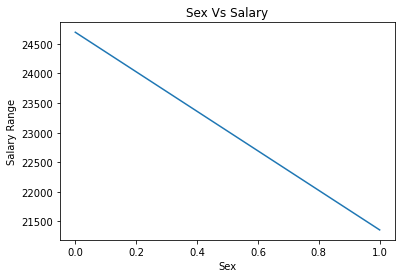

In [9]:
# 1 female , 0 male
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex Vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary Range')


In [10]:
# checking the correlation
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


### 1) There is a linear relationship between the Sex and Salary 

### 2) Salary range decreases for the female

### 3) No Transformation is required



In [11]:
# checking the correlation
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


### 1) There is a linear relationship between the Rank and Salary 

### 2) Rank increases the salary range also increases

### 3) No Transformation is required



Text(0, 0.5, 'Salary Range')

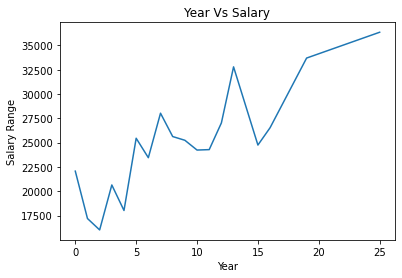

In [12]:
# Year. Number of years in current rank.

df.groupby('Year')['Salary'].mean().plot()
plt.title('Year Vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary Range')

In [13]:
# checking the correlation
df[['Year','Salary']].corr()

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


### 1) There is a linear relationship between the Year and Salary 

### 2) The no of year increases in the current role salary range also increases

### 3) No Transformation is required



Text(0, 0.5, 'Salary Range')

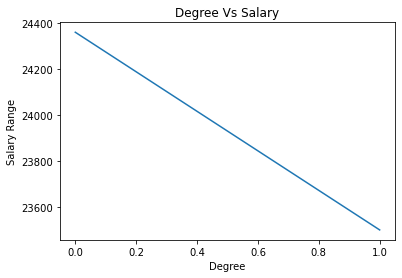

In [14]:
# Degree. Highest degree. 1 for doctorate, 0 for master's.

df.groupby('Degree')['Salary'].mean().plot()
plt.title('Degree Vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary Range')


In [15]:
# checking the correlation
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


### 1) There is a linear relationship between the Degree and Salary 

### 2) The Degree increases the salary range also increases

### 3) No Transformation is required



Text(0, 0.5, 'Salary Range')

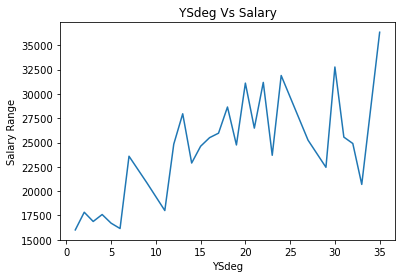

In [16]:
# YSdeg. Years since highest degree was earned.

df.groupby('YSdeg')['Salary'].mean().plot()
plt.title('YSdeg Vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary Range')

In [17]:
# checking the correlation
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


### 1) There is a linear relationship between the YSdeg and Salary 

### 2) The Years since highest degree increases the salary range also increases

### 3) No Transformation is required



In [18]:
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values
y = df['Salary'].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model training

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',
       'Year','Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Sex,2053.245241
Rank,6111.475191
Year,497.981457
Degree,-1538.135896
YSdeg,-164.068492


In [22]:
df.columns

Index(['Sex', 'Rank', 'Year', 'Degree', 'YSdeg', 'Salary'], dtype='object')